# Εργαστηριακή Άσκηση 8 - Πρακτικό Μέρος
## Εργαστήριο Βιοϊατρικής Τεχνολογίας

Ονοματεπώνυμο: Αλεξοπούλου Γεωργία

Αριθμός μητρώου: 03120164

### Εισαγωγή

Ας θεωρήσουμε πως βρίσκεστε στο στάδιο προ-επεξεργασίας εικόνων που απεικονίζουν δερματικές παθήσεις.

Γνωρίζετε πως όλες οι εικόνες περιέχουν κάποια πάθηση, αορίστου όμως σχήματος. Θέλετε με κάποιο τρόπο να πραγματοποιήσετε κατάτμηση της εικόνας, εντοπίζοντας ακριβώς τα όρια της παθολογίας.

Με αυτό τον τρόπο, σε μεταγενέστερο στάδιο, θα μπορείτε να εξάγετε στατιστικά και μορφολογικά χαρακτηριστικά, τα οποία μπορούν να χρησιμοποιηθούν για τη διάγνωση νέων εικόνων.

Τρέξτε το παρακάτω κομμάτι κώδικα για να φορτώσετε τα δεδομένα σας. Εάν για οποιοδήποτε λόγο οι εντολές δεν λειτουργούν, κατεβάστε και φορτώστε μόνοι σας τα δεδομένα ακολουθώντας το link.

In [11]:
import zipfile
import os

# Path to the zip file
zip_path = "C:/Users/Gina/OneDrive/Documents/ΜΑΘΗΜΑΤΑ/ΣΧΟΛΗ/Εργαστήριο Βιοϊατρικής Τεχνολογίας/Άσκηση 8/lesions.zip"
extract_path = "C:/Users/Gina/OneDrive/Documents/ΜΑΘΗΜΑΤΑ/ΣΧΟΛΗ/Εργαστήριο Βιοϊατρικής Τεχνολογίας/Άσκηση 8"

# Extract the contents of the zip file to a directory with the same name as the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Remove the zip file
os.remove(zip_path)

Ο κώδικας που δίνεται παρακάτω περιέχει κενά. Σε κάθε κενό, υπάρχει και ένα σχόλιο που περιγράφει το επιθυμητό αποτέλεσμα της εντολής.

Συμπληρώστε τα κενά ώστε να ολοκληρώσετε τον αλγόριθμο επεξεργασίας της εικόνας. Για βοήθεια μπορείτε να ανατρέξετε στην άσκηση που έγινε κατά τη διάρκεια του εργαστηρίου, η οποία βρίσκεται στον εργαστηριακό οδηγό και το mycourses.

**Προσοχή**: Σε ορισμένα σημεία (με bold)  ζητείται να σχολιάσετε σύντομα και με λόγια.

Τελικό παραδοτέο: το αρχείο σας .ipynb με εκτελεσμένο τον κώδικα. Παράδοση στο helios.

Ας φορτώσουμε τα δεδομένα που κατεβάσαμε προηγουμένως.

In [18]:
from skimage.io import imread
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path
import numpy as np


img_filepaths = list(Path("./lesions").glob("*.jpg"))

print(img_filepaths)

[WindowsPath('lesions/1.jpg'), WindowsPath('lesions/1003.jpg'), WindowsPath('lesions/1005.jpg'), WindowsPath('lesions/1007.jpg'), WindowsPath('lesions/1009.jpg'), WindowsPath('lesions/1012.jpg'), WindowsPath('lesions/1019.jpg'), WindowsPath('lesions/1022.jpg'), WindowsPath('lesions/1026.jpg'), WindowsPath('lesions/1027.jpg'), WindowsPath('lesions/1037.jpg'), WindowsPath('lesions/1038.jpg'), WindowsPath('lesions/1046.jpg'), WindowsPath('lesions/1049.jpg'), WindowsPath('lesions/1056.jpg'), WindowsPath('lesions/1058.jpg'), WindowsPath('lesions/1065.jpg'), WindowsPath('lesions/1074.jpg'), WindowsPath('lesions/1080.jpg'), WindowsPath('lesions/1083.jpg'), WindowsPath('lesions/1089.jpg'), WindowsPath('lesions/1091.jpg'), WindowsPath('lesions/1094.jpg'), WindowsPath('lesions/110.jpg'), WindowsPath('lesions/1112.jpg'), WindowsPath('lesions/1113.jpg'), WindowsPath('lesions/1119.jpg'), WindowsPath('lesions/1120.jpg'), WindowsPath('lesions/1128.jpg'), WindowsPath('lesions/1135.jpg'), WindowsPath('

Για να πάρουμε μια ιδέα των δεδομένων, εμφανίζουμε 5 τυχαίες εικόνες από αυτά.

<Figure size 1500x800 with 0 Axes>

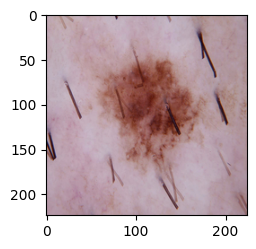

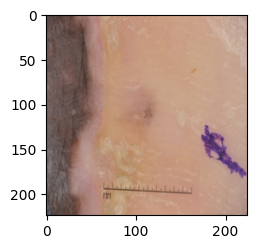

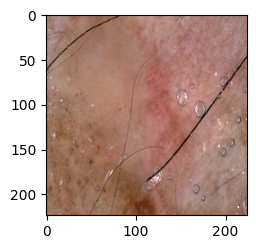

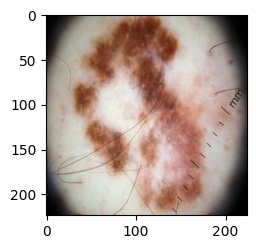

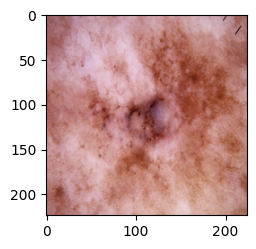

In [23]:
import random

plt.figure(figsize = (15, 8))
for i in range(5):
  random_img_filepath = random.choice(img_filepaths)
  random_img = imread(random_img_filepath) # Διάβασε την εικόνα που βρίσκεται στο random_img_filepath
  
  plt.figure(figsize = (15, 8))
  plt.subplot(1, 5, i+1)
  plt.imshow(random_img, cmap='gray')
  # Εμφάνισε την εικόνα που μόλις διαβάστηκε

plt.show()

Τώρα επιλέγουμε μια τυχαία εικόνα. Την εμφανίζουμε, μαζί με τα 3 κανάλια της (RGB). Θέλουμε να δούμε ποιό κανάλι είναι πιο βολικό ώστε να δουλέψουμε με αυτό.

<Figure size 1500x800 with 0 Axes>

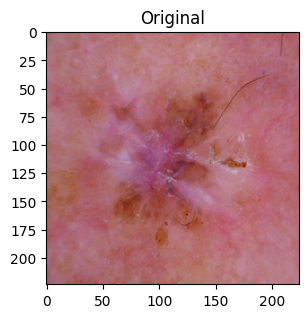

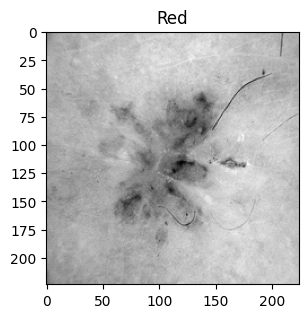

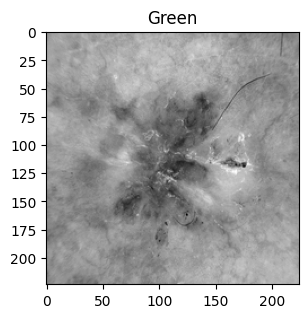

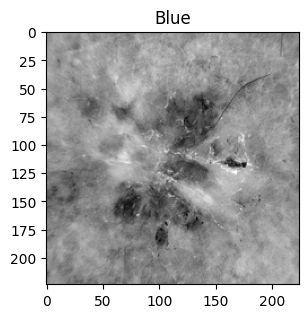

In [24]:
plt.figure(figsize = (15, 8))

# Διάβασε μια τυχαία εικόνα από τη λίστα με χρήση της εντολής random.choice(img_filepaths)
random_img_filepath2 = random.choice(img_filepaths)
random_img2 =imread(random_img_filepath2)

plt.figure(figsize = (15, 8))
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(random_img2)
plt.show()
# Εμφάνισε την εικόνα

plt.figure(figsize = (15, 8))
plt.subplot(1, 4, 2)
plt.title('Red')
plt.imshow(random_img2[:,:,0], cmap='gray')
plt.show()
# Εμφάνισε το κόκκινο κανάλι της εικόνας

plt.figure(figsize = (15, 8))
plt.subplot(1, 4, 3)
plt.title('Green')
plt.imshow(random_img2[:,:,1], cmap='gray')
plt.show()
# Εμφάνισε το πράσινο κανάλι της εικόνας

plt.figure(figsize = (15, 8))
plt.subplot(1, 4, 4)
plt.title('Blue')
plt.imshow(random_img2[:,:,2], cmap='gray')
plt.show()
# Εμφάνισε το μπλε κανάλι της εικόνας


**Ποιό από όλα τα κανάλια φαίνεται καταλληλότερο για την ανίχνευση των ορίων της παθολογίας; Εξηγήστε σύντομα.**

Στο κανάλι που θεωρείτε καταλληλότερο, εφαρμόστε ένα K-Means clustering. Η μέθοδος αυτή κατηγοριοποιεί κάθε pixel της εικόνας σας σε μία από K ομάδες. 

Καταλληλότερο φαίνεται το τρίτο κανάλι "BLUE" γιατί κάνοντας το plot, παρατηρούμε ότι τα παθολογικά pixel της εικόνας ξεχωρίσουν πολύ απο τα μη-παθολογικά, που θα κάνει τον διασχωρισμό τους ευκολότερο.

Θέλετε να χωρίσετε τα pixels σε παθολογικά και μη-παθολογικά. Επομένως χρειάζεστε 2 ομάδες. 

---

***Hint***: Στο documentation του KMeans clustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) θα βρείτε ένα παράδειγμα για να χρησιμοποιήσετε. 

Βλέπουμε πως η μέθοδος fit περιμένει ως είσοδο έναν πίνακα $Χ$ με διαστάσεις (n_samples, n_features). 

- Εδώ, samples είναι όλα τα pixels της εικόνας τα οποία είναι σε πλήθος: ``img_height * img_width``. 
- Feature είναι απλά η ένταση της φωτεινότητας, άρα ένα μόνο στοιχείο. 

Άρα, ως είσοδος στη συνάρτηση fit θα δοθεί η εικόνα μετασχηματισμένη σε διαστάσεις (``img_height * img_width, 1``). Μπορείτε λοιπόν να χρησιμοποιήσετε ως είσοδο:

``random_img_bw.reshape((height*width,1))``

είτε πιο απλά

``random_img_bw.reshape((-1, 1))``

Το τελικό αποτέλεσμα θα πρέπει να μετασχηματιστεί πάλι πίσω στις διαστάσεις της αρχικής εικόνας (βλ. το ακριβώς επόμενο κομμάτι κώδικα με τα kmeans.labels_).



(224, 224)


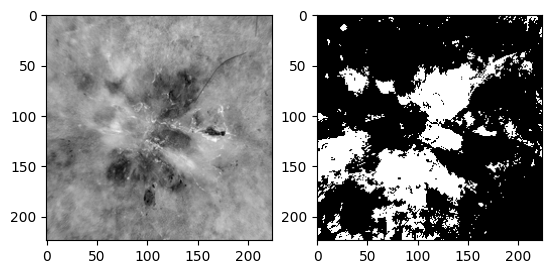

In [28]:
from sklearn.cluster import KMeans
from skimage.color import rgb2gray

random_img_bw = random_img2[:,:,2] # Αποθήκευσε σε αυτή τη μεταβλητή το επιλεγμένο (καταλληλότερο) κανάλι
size = np.size(random_img_bw)
shape = random_img_bw.shape
print(shape)

X = random_img_bw.reshape((size,1))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X) # Εφαρμογή KMeans Clustering για τη διάκριση των πίξελς μεταξύ Κ ομάδων.
img_final = kmeans.labels_.reshape(224,224,1)
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

plt.figure()
plt.subplot(1,2,1)
plt.imshow(random_img_bw, cmap = 'gray')
# Εμφάνισε ξανά την αρχική εικόνα

plt.subplot(1,2,2)
plt.imshow(img_final, cmap = 'gray')
# Εμφάνιση της εικόνας έπειτα από kmeans clustering. 
# Εφόσον έχετε πραγματοποιήσει kmeans, η νέα εικόνα θα είναι τα labels (kmeans.labels_)
# Θα έχετε δηλαδή μια δυαδική εικόνα.

plt.show()

Θέλουμε να πραγματοποιήσουμε μια ομαλοποίηση της εικόνας, και απόρριψη των πολύ μικρών, μεμονομένων περιοχών. Για αυτό το λόγο κάνουμε ένα μορφολογικό άνοιγμα και κλείσιμο της εικόνας.

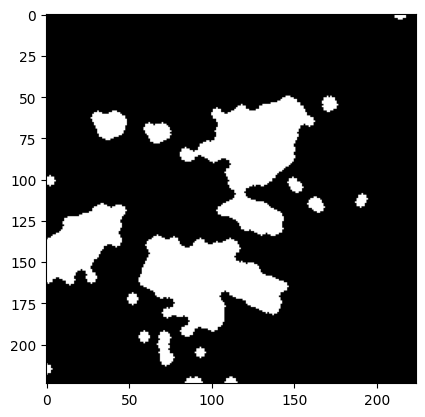

In [31]:
from skimage.morphology import disk, binary_opening, binary_closing

filtered_img = binary_opening(kmeans.labels_.reshape(random_img_bw.shape), disk(3))
filtered_img = binary_closing(filtered_img, disk(3))

plt.imshow(filtered_img, cmap='gray')
# Εμφάνιση της εικόνας filtered_img
plt.show()

Τα pixels της εικόνας έχουν χωριστεί σε 2 ομάδες. Όμως ποια ομάδα είναι η παθολογική, και ποιά η φυσιολογική;

Με την εντολή kmeans.cluster_centers_ μπορούμε να βρούμε το κέντρο της κάθε ομάδας (ή αλλιώς μια τιμή αντιπροσωπευτική της φωτεινότητας της κάθε ομάδας).

**Πώς μπορείτε να βρείτε ποιά ομάδα είναι η παθολογική βάσει του κέντρου της; Εξηγείστε σύντομα.**

Γνωρίζουμε ότι τα μη-παθολογικά pixel της εικόνας θα έχουν υψηλότερη φωτεινώτητα. Επομένως στο label, καθώς θα βάλω τη θέση της παθολογικής ομάδας, θα βάλω το argmin.

Η εντολή argmin και argmax μας δίνει τη θέση της ελάχιστης και μέγιστης τιμής σε έναν πίνακα. Στη μεταβλητή label αποθηκεύστε τη θέση της παθολογικής ομάδας.

In [32]:
print(kmeans.cluster_centers_)

print(kmeans.cluster_centers_.argmin())
print(kmeans.cluster_centers_.argmax())

label = kmeans.cluster_centers_.argmin() # Επιλέξτε μεταξύ του argmin, και του argmax.

[[122.20153834]
 [ 83.21589054]]
1
0


Δημιουργούμε μια μάσκα στην οποία όλα τα pixels έχουν την τιμή 0, εκτός αυτών που ανήκουν εντός της ομάδας που επιλέξατε παραπάνω, τα οποία θα έχουν την τιμή 1.

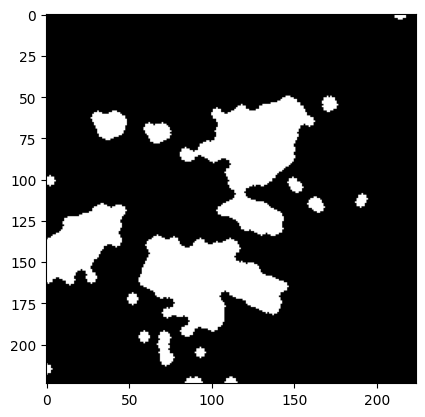

In [33]:
mask = np.zeros_like(random_img_bw)
mask[filtered_img == label] = 1

plt.imshow(mask, cmap='gray')
plt.show()

Δημιουργούμε το περίγραμμα της μάσκας, χρησιμοποιώντας ανίχνευση ακμών με Sobel.

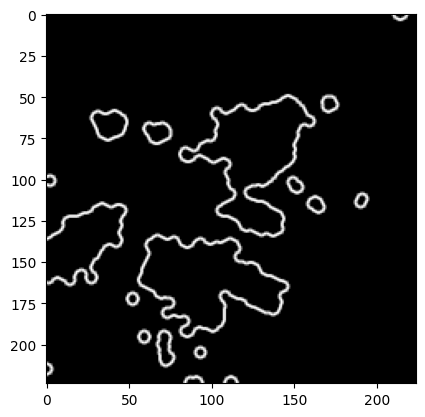

In [35]:
from skimage import filters

mask2 = filters.sobel(mask) # Εφαρμογή του τελεστή Sobel για ανίχνευση ακμών

plt.imshow(mask2, cmap='gray')
plt.show()

Τελικά, εμφανίζουμε το τελικό μας αποτέλεσμα.

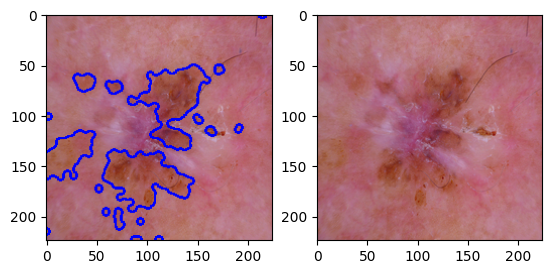

In [36]:
final_img = np.copy(random_img2)
final_img[mask2>0] = [0, 0, 255]
# Κάνε μπλε τα σημεία της εικόνας final_img, στα οποία τα pixels της μάσκας mask2 είναι λευκά.

plt.subplot(1,2,1)
plt.imshow(final_img)
# Εμφάνιση της final_img

plt.subplot(1,2,2)
plt.imshow(random_img2)
# Εμφάνιση της αρχικής εικόνας random_img2

plt.show()

Χρησιμοποιώντας τη μάσκα και την αρχική εικόνα, εμφανίστε μόνο την έγχρωμη παθολογική περιοχή, μαυρίζοντας τα pixels του δέρματος.

Για την παθολογική περιοχή μόνο (δηλαδή χωρίς να λαμβάνετε υπόψιν το δέρμα ή τα pixels που μόλις μαυρίσατε), υπολογίστε στατιστικά χαρακτηριστικά όπως στην εργαστηριακή άσκηση που είδατε στο μάθημα (μέση τιμή, τυπική απόκλιση, λοξότητα, κύρτωση). Υπόδειξη: ενώ υπάρχουν πολλοί τρόποι να γίνει αυτό, ο τρόπος με τον οποίο επιλέξατε τα pixels που χρωματίσατε μπλε μέσω της μάσκας mask2, ίσως βοηθήσει.

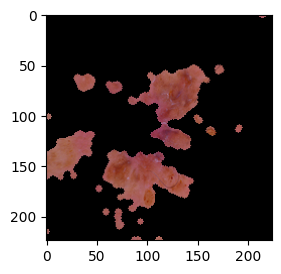

In [37]:
from scipy.stats import skew, entropy, kurtosis

ROI = np.copy(random_img2)
ROI[mask<1] = [0,0,0]

plt.subplot(1,2,1)
plt.imshow(ROI)

pixels = []
pixels.append(ROI[mask>0])
roi2 = np.array(pixels)

statistics = [np.mean(roi2),np.std(roi2),skew(roi2, axis=None),kurtosis(roi2, axis=None)]